In [35]:
#Hojun Lim
import numpy as np
import pprint as pp
import matplotlib.pyplot as plt


# Exercise 12.2 Play with the Perceptron Algorithm
## 12.2.1) Pick a vector $$w^{*} ∈R^2$$. Pick 1000 random points $$x_{i}$$ uniformly  distributed in $$[−100,100]^{2} ⊂ R^{2}$$ with $$|〈w∗x〉| ≥1 $$ and compute labels $$\\$$  $$ℓi← $$ $$sign(〈w∗xi〉) ∈ [−1,+1]$$. 
 
#### (a) run the perceptron algorithm with kernel function $$k(x,y) = x \cdot y$$. 

In [18]:
def perceptron_algorithm(x, label, n, kernel): # n denotes the number of data points
    update_cnt = 0
    c = np.zeros((n,1)) # coefficients of vector w starts with zero 
    w = np.zeros((2,1))
    while(True):

        if all(kernel(x, w)*label > 0): # when all points are classified correctly with normal vector w
            break
            

        for idx in np.where(kernel(x, w)*label <= 0)[0]: # when the condition is violated

            c[idx] = c[idx] + label[idx] # update the coefficient
            update_cnt += 1
            
        w = np.matmul(x.T, c) # compute the normal vector w based on given data x and coefficients c 

    return w, update_cnt
    
    
def inner_product_kernel(x, w):
    return np.matmul(x, w)



In [28]:
w_star = np.random.uniform(size=(2,1))# samples the normal w
w_star = w_star/np.linalg.norm(w_star) # renormalize the sampled w_star to ensure its length = 1

n = 1000 # number of points 
xy_min = [-100, -100] # minimum value for x and y coordinates
xy_max = [100, 100] # maximum value for x and y coordinates
x = np.random.uniform(low=xy_min, high=xy_max, size=(n,2)) # sampled data points

w_star_dot_w = np.matmul(x,w_star) # compute <w_star | x>
abs_w_star_dot_w = abs(w_star_dot_w) # abs(<w_star | x>)

while(True): #extract indicies where abs(<w_star| x_{i}>) is smaller than 1

    for idx in np.where(abs_w_star_dot_w < 1): # resample and compute the < w_star | x > until all points has abs(< w_star | x >) >1
        x[idx] = np.random.uniform(low=xy_min, high=xy_max, size=(1,2))
        abs_w_star_dot_w[idx] = abs(np.matmul(x[idx], w_star))
        
    if all(abs_w_star_dot_w>1):
        break        

label = np.sign(np.matmul(x, w_star)) # assign labels to respective data points x

w, update_cnt = perceptron_algorithm(x, label, n, kernel = inner_product_kernel)
print('w_star:')
pp.pprint(w_star)
print('computed w:')
pp.pprint(w/np.linalg.norm(w))




error 1000
error 7
error 2
error 2
error 1
w_star:
array([[0.99823519],
       [0.05938444]])
computed w:
array([[0.9989943 ],
       [0.04483738]])


#### (b) report about your experiences
-> It seems the perceptron algorithm can find the true normal vector w*. and unlike expected the actual number of updates is considerably smaller than the number of updates in the bound from lecture.
#### (c) the bound of number of updates in theory: $$r^{2} \vert\vert\; |w^{*}>\vert\vert^{2}_{2}$$


In [29]:
norm_x = np.linalg.norm(x, axis=1)
max_idx = np.argmax(norm_x)
r = norm_x[max_idx]

update_bound = np.square(r)*np.square(np.linalg.norm(w_star))
print('bound of the number of updates in theory = ', update_bound)

print('Actual number of updates in (a) = ', update_cnt)

bound of the number of updates in theory =  19616.070140116957
Actual number of updates in (a) =  1012


## 12.2.2) Pick 1000 random points [rcosφ, rsinφ] with r ∈ [0.8,1.2]∪[1.6,2.4] uni-formly chosen andφ∈[0,2π] uniformly chosen and label−1 for r ≤ 1.2 and label +1 for r ≥1.6

#### (a) Run the perceptron algorithm with the Gaussian kernel.

In [67]:
interval_A_min = 0.8 
interval_A_max = 1.2 
interval_B_min = 1.6
interval_B_max = 2.4 
pi_min = 0
pi_max = 2*np.pi


rand = np.random.uniform(0,1,n)
labels = np.asarray([-1 if rand_value < 0.33333 else 1 for rand_value in rand]) # if rand_value is smaller than 0.6666 extract values for r from the interval 'A': [0.8, 1.2] otherwise from interval 'B': [1.6, 2.4] 
labels = np.reshape(labels, (n,-1))
r = [np.random.uniform(interval_A_min, interval_A_max) if label==-1 else np.random.uniform(interval_B_min, interval_B_max) for label in labels]
pi = np.random.uniform(pi_min, pi_max, n)


# make the data points x
x = []
for i in range(n): 
    x.append([r[i]*np.cos(pi[i]), r[i]*np.sin(pi[i])])
x = np.reshape(np.asarray(x), (n,-1))


In [68]:
def perceptron_algorithm_with_gaussian_kernel(x, label, n, kernel): # n denotes the number of data points
    update_cnt = 0
    c = np.zeros((n,1)) # coefficients of vector w starts with zero 
    w = np.zeros((2,1))
    while(True):

#        print(np.shape(label), np.shape(kernel(x,c)))
        if all(kernel(x, c)*label > 0): # when all points are classified correctly with normal vector w
            break
            
#        print(len(np.where(kernel(x, c)*label <= 0)[0]))
        for idx in np.where(kernel(x, c)*label <= 0)[0]: # when the condition is violated
            c[idx] = c[idx] + label[idx] # update the coefficient
            update_cnt += 1
            
#        w = np.matmul(x.T, c) # compute the normal vector w based on given data x and coefficients c 
#        print(w)
    return c, update_cnt
    


    
def gaussian_kernel(x, c):
    const = 1
    
    # build the gram matrix
    Gram_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            Gram_matrix[i][j] = np.exp(-1*const*np.square(np.linalg.norm(x[i] - x[j]))) # gram matrix with gaussian kernel
    
    
    return np.matmul(Gram_matrix, c)

    
c, update_cnt = perceptron_algorithm_with_gaussian_kernel(x, labels, n, gaussian_kernel)
#print('computed coefficients with gaussian kernel:' , c)
predictions = gaussian_kernel(x, c)


#### (b) Report the result

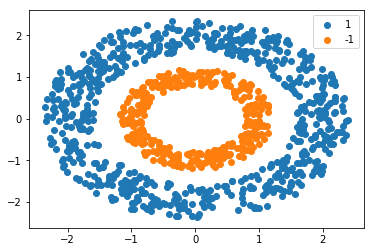

In [69]:
class_A = x[np.where(predictions >= 1)[0]] # class A denotes the label '1'
class_B = x[np.where(predictions <= -1)[0]]  # class B denotes the label '-1'

plt.scatter(class_A[:,0], class_A[:,1], label='1')
plt.scatter(class_B[:,0], class_B[:,1], label='-1')
plt.legend()
plt.show()

## 12.2.3) Pick 1000 random points [1+ rcosφ, 1+ rsinφ] with r ∈ [0.8,1.2]∪[1.6,2.4] uni-formly chosen andφ∈[0,2π] uniformly chosen and label−1 for r ≤ 1.2 and label +1 for r ≥1.6

#### (a) Run the perceptron algorithm with the Gaussian kernel.

In [70]:
# update the data points x
x = []
for i in range(n): 
    x.append([1+ r[i]*np.cos(pi[i]), 1+ r[i]*np.sin(pi[i])])
x = np.reshape(np.asarray(x), (n,-1))

c, update_cnt = perceptron_algorithm_with_gaussian_kernel(x, labels, n, gaussian_kernel)
#print('computed coefficients with gaussian kernel:' , c)
predictions = gaussian_kernel(x, c)

#### (b) Report the result

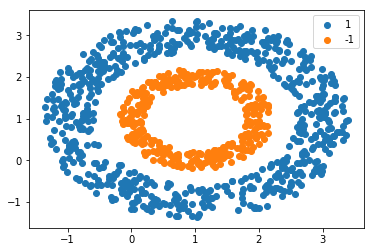

In [71]:
class_A = x[np.where(predictions >= 1)[0]] # class A denotes the label '1'
class_B = x[np.where(predictions <= -1)[0]]  # class B denotes the label '-1'

plt.scatter(class_A[:,0], class_A[:,1], label='1')
plt.scatter(class_B[:,0], class_B[:,1], label='-1')
plt.legend()
plt.show()